In [34]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ames_df = pd.read_csv("../data/AmesHousing.txt", sep="\t")

In [3]:
ames_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
ames_df_rows, ames_df_columns = ames_df.shape
print("rows = {0} columns = {1}".format(ames_df_rows,ames_df_columns))

rows = 2930 columns = 82


In [5]:
ames_df['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([ 11., 135., 451., 882., 565., 343., 210., 119.,  88.,  46.,  35.,
         16.,  11.,   3.,   6.,   3.,   4.,   0.,   0.,   2.]),
 array([ 12789.  ,  49899.55,  87010.1 , 124120.65, 161231.2 , 198341.75,
        235452.3 , 272562.85, 309673.4 , 346783.95, 383894.5 , 421005.05,
        458115.6 , 495226.15, 532336.7 , 569447.25, 606557.8 , 643668.35,
        680778.9 , 717889.45, 755000.  ]),
 <a list of 20 Patch objects>)

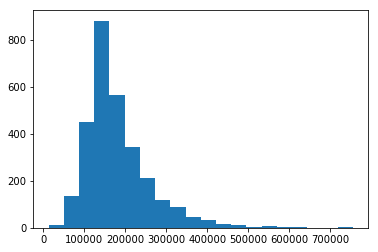

In [6]:
plt.hist(ames_df['SalePrice'], bins=20)

count    2930.000000
mean       12.020969
std         0.407587
min         9.456341
25%        11.771436
50%        11.982929
75%        12.271392
max        13.534473
Name: log_SalePrice, dtype: float64


(array([  2.,   0.,   0.,   0.,   3.,   3.,   8.,  27.,  49., 131., 314.,
        662., 619., 463., 315., 184.,  93.,  42.,  12.,   3.]),
 array([ 9.45634071,  9.66024732,  9.86415394, 10.06806055, 10.27196717,
        10.47587379, 10.6797804 , 10.88368702, 11.08759363, 11.29150025,
        11.49540687, 11.69931348, 11.9032201 , 12.10712672, 12.31103333,
        12.51493995, 12.71884656, 12.92275318, 13.1266598 , 13.33056641,
        13.53447303]),
 <a list of 20 Patch objects>)

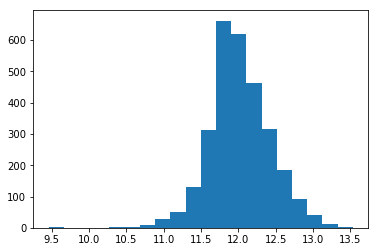

In [7]:
ames_df['log_SalePrice'] = np.log(ames_df['SalePrice'])
print(ames_df['log_SalePrice'].describe())
plt.hist(ames_df['log_SalePrice'], bins=20)

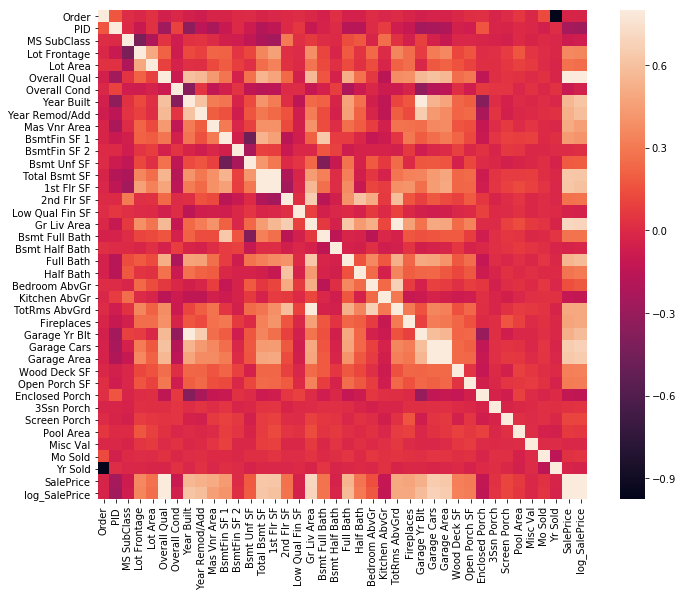

In [8]:
corr_mat = ames_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True);

In [11]:
correlation_ratio = 0.6
indices = np.where(corr_mat > correlation_ratio)
indices = [(corr_mat.index[x], corr_mat.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[('Overall Qual', 'SalePrice'),
 ('Overall Qual', 'log_SalePrice'),
 ('Year Built', 'Year Remod/Add'),
 ('Year Built', 'Garage Yr Blt'),
 ('Year Built', 'log_SalePrice'),
 ('Year Remod/Add', 'Garage Yr Blt'),
 ('BsmtFin SF 1', 'Bsmt Full Bath'),
 ('Total Bsmt SF', '1st Flr SF'),
 ('Total Bsmt SF', 'SalePrice'),
 ('Total Bsmt SF', 'log_SalePrice'),
 ('1st Flr SF', 'SalePrice'),
 ('1st Flr SF', 'log_SalePrice'),
 ('2nd Flr SF', 'Gr Liv Area'),
 ('2nd Flr SF', 'Half Bath'),
 ('Gr Liv Area', 'Full Bath'),
 ('Gr Liv Area', 'TotRms AbvGrd'),
 ('Gr Liv Area', 'SalePrice'),
 ('Gr Liv Area', 'log_SalePrice'),
 ('Bedroom AbvGr', 'TotRms AbvGrd'),
 ('Garage Cars', 'Garage Area'),
 ('Garage Cars', 'SalePrice'),
 ('Garage Cars', 'log_SalePrice'),
 ('Garage Area', 'SalePrice'),
 ('Garage Area', 'log_SalePrice'),
 ('SalePrice', 'log_SalePrice')]

In [35]:
def corrank(X):
        df = pd.DataFrame([[(i,j),X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['pairs','corr'])    
        print(df.sort_values(by='corr',ascending=False))

corrank(ames_df)

                                pairs      corr
779        (SalePrice, log_SalePrice)  0.946303
702        (Garage Cars, Garage Area)  0.889676
270       (Year Built, Garage Yr Blt)  0.834849
218     (Overall Qual, log_SalePrice)  0.825645
533      (Gr Liv Area, TotRms AbvGrd)  0.807772
429       (Total Bsmt SF, 1st Flr SF)  0.800720
217         (Overall Qual, SalePrice)  0.799262
547          (Gr Liv Area, SalePrice)  0.706780
548      (Gr Liv Area, log_SalePrice)  0.695862
713      (Garage Cars, log_SalePrice)  0.675318
628    (Bedroom AbvGr, TotRms AbvGrd)  0.672647
481         (2nd Flr SF, Gr Liv Area)  0.655251
301   (Year Remod/Add, Garage Yr Blt)  0.652310
724      (Garage Area, log_SalePrice)  0.651132
712          (Garage Cars, SalePrice)  0.647877
723          (Garage Area, SalePrice)  0.640401
352    (BsmtFin SF 1, Bsmt Full Bath)  0.640020
453        (Total Bsmt SF, SalePrice)  0.632280
529          (Gr Liv Area, Full Bath)  0.630321
454    (Total Bsmt SF, log_SalePrice)  0

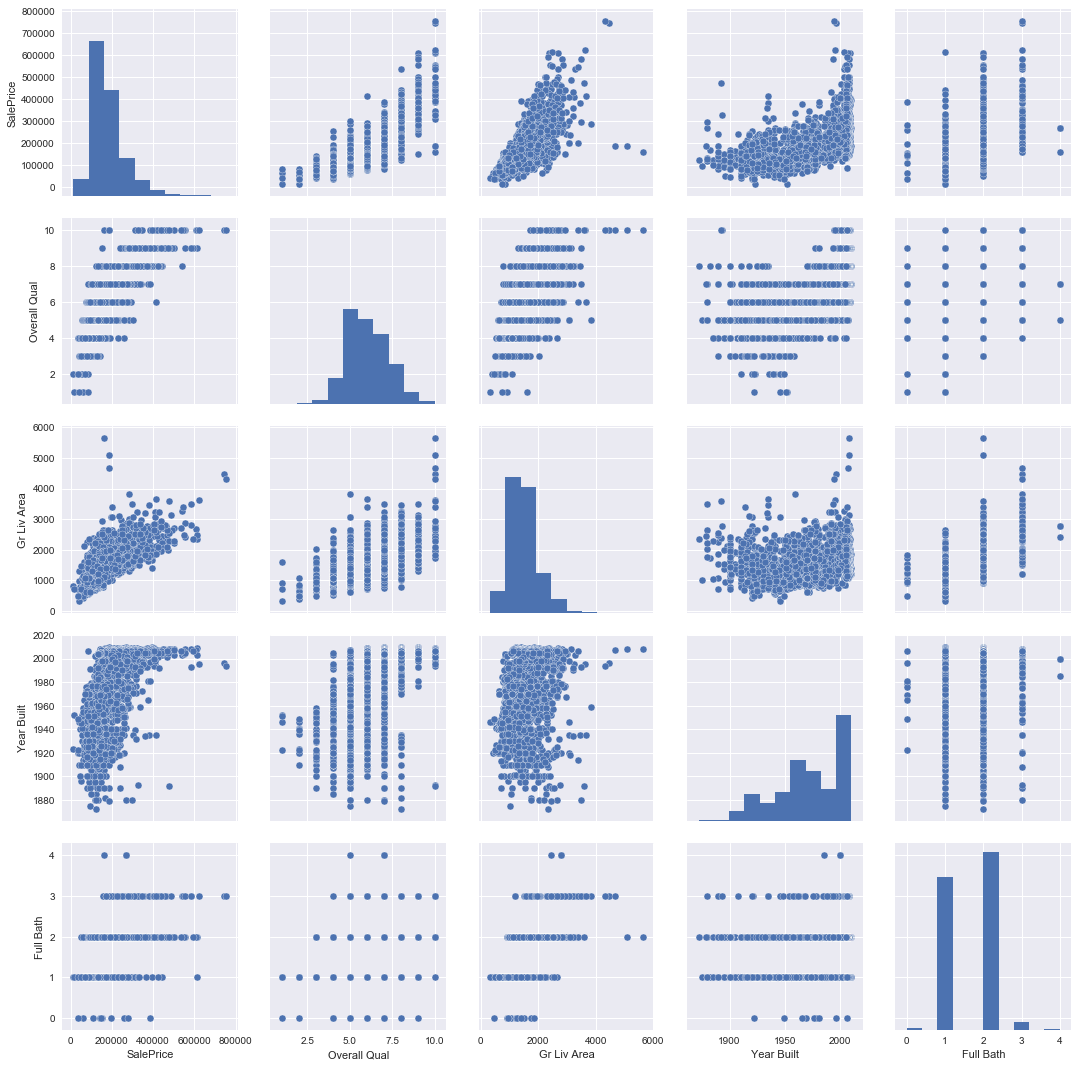

In [12]:
sns.set()
cols = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Year Built', 'Full Bath']
sns.pairplot(ames_df[cols], size = 3)
plt.show();

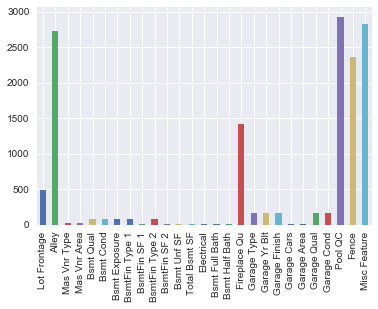

In [24]:
missing_ames = ames_df.isnull().sum()
missing_ames = missing_ames[missing_ames > 0]
missing_ames.plot.bar()

In [27]:
ames_df["Garage Area"].dtype=="object"

False

In [28]:
ames_df["Garage Area"].dtype

dtype('float64')

In [29]:
ames_df["Garage Cars"].dtype

dtype('float64')

In [31]:
ames_df["Street"].dtype

dtype('O')